In [1]:
%matplotlib inline
from IPython.core.display import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nansat import Nansat, Domain, Nansatmap

n1 = Nansat('http://thredds.met.no/thredds/dodsC/osisaf/met.no/ice/conc/2016/04/ice_conc_nh_polstere-100_multi_201604011200.nc', bands=['ice_conc'])       

n2 = Nansat(
'http://thredds.met.no/thredds/dodsC/myocean/siw-tac/sst-metno-arc-sst03/20160401000000-METNO-L4_GHRSST-SSTfnd-METNO_OI-ARC-v02.0-fv02.0.nc',
    bands=['analysed_sst']) 

n3 = Nansat(
'http://thredds.met.no/thredds/dodsC/osisaf/met.no/ice/drift_lr/merged/2016/04/ice_drift_nh_polstere-625_multi-oi_201604011200-201604031200.nc',
    bands=['dX', 'dY']) 
    
d = Domain('+proj=stere +lon_0=-45 +lat_0=90 +no_defs', '-te 300000 -1200000 1700000 300000 -tr 10000 10000')
n1.reproject(d)
n2.reproject(d)
n3.reproject(d)

ice_conc = n1['ice_conc']
analysed_sst = n2['analysed_sst']                                                                                                           
dX = n3['dX']
dY = n3['dY']

/home/antonk/py/nansat/nansat/mappers/opendap.py:89: UserWarning: Time consuming loading time from OpenDAP...
  warnings.warn('Time consuming loading time from OpenDAP...')
/home/antonk/py/nansat/nansat/mappers/opendap.py:91: UserWarning: Loading time - OK!
  warnings.warn('Loading time - OK!')
/home/antonk/py/nansat/nansat/mappers/opendap.py:148: UserWarning: 
            Date is not specified! Will return the first layer.
            Please add date="YYYY-MM-DD"
  Please add date="YYYY-MM-DD"''')


In [3]:
ice_conc[ice_conc <=1 ] = np.nan
analysed_sst[analysed_sst < 0] = np.nan
#plt.imshow(ice_conc, vmin=0);plt.colorbar();plt.show()
#plt.imshow(analysed_sst, vmin=270);plt.colorbar()
#plt.imshow(ice_conc, vmin=0, vmax=100, cmap='bone');plt.colorbar()
#;plt.colorbar();plt.show()

nmap = Nansatmap(n2, resolution='l')
nmap.imshow(analysed_sst, vmin=270, cmap='viridis')
nmap.add_colorbar(shrink=0.5, pad=0.05)
nmap.imshow(ice_conc, vmin=0, vmax=100, cmap='bone')
nmap.quiver(dX, dY, step=5)
nmap.drawmeridians([-20, 0, 20, 40], labels=[False, True, False, True], fontsize=6)
nmap.drawparallels([75, 80, 85], labels=[True, False, True, False], fontsize=6)
nmap.save('nmap_example5.png', dpi=300)
plt.close('all')

/home/antonk/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


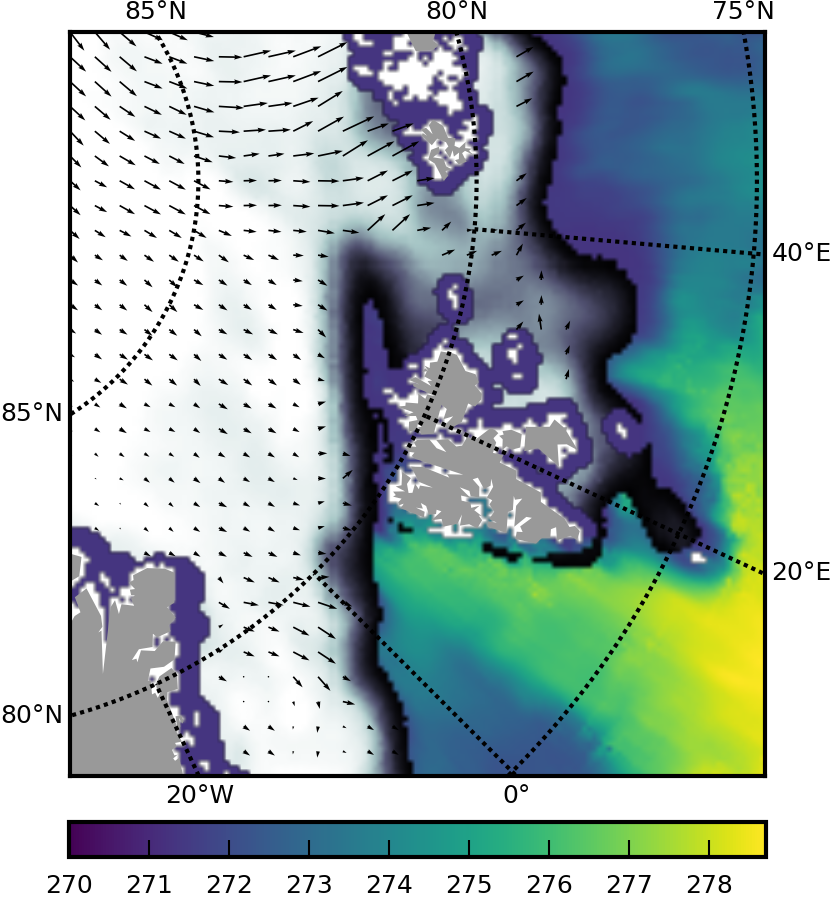

In [4]:
Image('nmap_example5.png')